In [13]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import sklearn

In [14]:
# read 2021 performance data (testing set)
raw_df_2021 = pd.read_csv('phs_2021_1.csv', parse_dates=['start_time'])

In [15]:
# inspect data
raw_df_2021.head()

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
1,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Assists,All Heroes,8.000000
2,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,All Heroes,56.481102
3,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,All Heroes,1495.492155
4,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Damage - Quick Melee,All Heroes,60.000000


In [16]:
raw_df_2021.describe()

,esports_match_id,stat_amount
count,1.031558e+06,1.031558e+06
mean,3.732601e+04,1.258581e+03
std,6.990130e+01,3.432481e+03
min,3.714700e+04,2.448381e-05
25%,3.726900e+04,3.000000e+00
50%,3.732700e+04,3.600000e+01
75%,3.738200e+04,5.943941e+02
max,3.744800e+04,1.070000e+05


In [17]:
raw_df_2021.dtypes

start_time          datetime64[ns]
esports_match_id             int64
tournament_title            object
map_type                    object
map_name                    object
player_name                 object
team_name                   object
stat_name                   object
hero_name                   object
stat_amount                float64
dtype: object

In [18]:
all_players = raw_df_2021['player_name'].unique()

In [19]:
# declare different classes of heros for sorting later
support_heros = ['Ana', 'Baptiste', 'Moira', 
                 'Brigitte', 'Lúcio', 
                 'Zenyatta', 'Mercy', 'All Heroes']

tank_heros = ['Reinhardt', 'Winston', 
              'Wrecking Ball',  'D.Va',
              'Sigma', 'Zarya',
              'Orisa', 'Roadhog', 'All Heroes']

damage_heros = ['Echo', 'Mei', 'Reaper', 
                'Sombra', 'Symmetra',
                'Doomfist', 'Tracer',
                'Ashe', 'McCree', 
                'Hanzo', 'Pharah',
                'Widowmaker', 'Genji', 'Soldier: 76', 'Junkrat',
                'Bastion', 'Torbjörn', 'All Heroes']

In [41]:
# make dataframe 
clean_df_2021 = pd.DataFrame({'Name': [], 
                       'Total Appearances' : [],
                       'Team Name': [],
                       'Hero Class': []
                      })
# get unique stat names to be set as column values
all_stat_names = raw_df_2021['stat_name'].unique().tolist()

# add blank columns
for stat_name in all_stat_names:
    clean_df_2021[stat_name] = []

# iterate through each player
for name in all_players:
    # make smaller dataframe of all values associated with a specific player
    per_player_df = raw_df_2021.loc[(raw_df_2021['player_name'] == name)]
    
    # count total player appearances through unique esports_match_id
    appearance_count = per_player_df['esports_match_id'].unique().size
    
    # get team name
    team_name = per_player_df.iloc[0]['team_name']
    
    # get list of heros played
    heros_played = per_player_df['hero_name'].unique().tolist()
    
    # sort heros into classes
    if all(item in support_heros for item in heros_played):
        hero_class = 'Support'
    elif all(item in tank_heros for item in heros_played):
        hero_class = 'Tank'
    elif all(item in damage_heros for item in heros_played):
        hero_class = 'Damage'
    else:
        hero_class = 'Mixed'
    
    # create list to temporarily store values before being added to dataframe
    all_stats = [name, appearance_count, team_name, hero_class]
    
    # make list of all values to be added to dataframe
    # skip first four because their value needs to be accessed and calculated manually
    for column_name in clean_df_2021.columns[4:]:
        # account for values that are meant to be averages
        # since some players appear in more games than others
        if "Average" in str(column_name):
            all_stats.append(per_player_df.loc[per_player_df['stat_name'] == column_name]['stat_amount'].sum() / appearance_count)
        else:
            all_stats.append(per_player_df.loc[per_player_df['stat_name'] == column_name]['stat_amount'].sum())
    
    # add data to dataframe
    clean_df_2021.loc[len(clean_df_2021.index)] = all_stats

C:\Users\ISHANH~1\AppData\Local\Temp/ipykernel_12784/3665776182.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  clean_df_2021[stat_name] = []


In [42]:
clean_df_2021

,Name,Total Appearances,Team Name,Hero Class,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage - Quick Melee,Damage Blocked,...,Damage - Chain Hook,Damage - Whole Hog,Enemies Hooked,Hook Accuracy,Whole Hog Efficiency,Whole Hog Kills,Tank Efficiency,Tank Kills,NaN,Total Mayhem Kills
0,Doha,35.0,Dallas Fuel,Damage,6.249478e+06,4470.0,979.539334,1.163108e+06,17164.568955,5.800057e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FEARLESS,35.0,Dallas Fuel,Tank,3.703786e+06,4874.0,870.201960,7.505016e+05,54636.681206,4.336671e+06,...,60.0,0.0,2.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,Fielder,34.0,Dallas Fuel,Support,2.067175e+06,4238.0,945.715048,5.783026e+05,9560.236314,1.646478e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hanbin,35.0,Dallas Fuel,Tank,4.174012e+06,4862.0,1064.916363,1.247730e+06,44280.432409,4.292558e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Jecse,35.0,Dallas Fuel,Support,1.766062e+06,3546.0,904.300168,4.116988e+05,22860.980167,2.756554e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Ttuba,6.0,Washington Justice,Support,1.111108e+05,240.0,347.524407,2.567265e+04,162.455589,6.425335e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,Develop,1.0,Shanghai Dragons,Damage,1.966029e+04,12.0,232.230340,3.672498e+03,372.838597,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,sHockWave,5.0,Philadelphia Fusion,Damage,2.321282e+05,144.0,370.621678,7.158228e+04,944.581965,1.338287e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,ColdesT,3.0,Hangzhou Spark,Support,2.433222e+05,212.0,843.333750,8.890451e+04,120.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
clean_df_2021

,Name,Total Appearances,Team Name,Hero Class,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage - Quick Melee,Damage Blocked,...,Damage - Chain Hook,Damage - Whole Hog,Enemies Hooked,Hook Accuracy,Whole Hog Efficiency,Whole Hog Kills,Tank Efficiency,Tank Kills,NaN,Total Mayhem Kills
0,Doha,35.0,Dallas Fuel,Damage,6.249478e+06,4470.0,979.539334,1.163108e+06,17164.568955,5.800057e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FEARLESS,35.0,Dallas Fuel,Tank,3.703786e+06,4874.0,870.201960,7.505016e+05,54636.681206,4.336671e+06,...,60.0,0.0,2.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,Fielder,34.0,Dallas Fuel,Support,2.067175e+06,4238.0,945.715048,5.783026e+05,9560.236314,1.646478e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hanbin,35.0,Dallas Fuel,Tank,4.174012e+06,4862.0,1064.916363,1.247730e+06,44280.432409,4.292558e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Jecse,35.0,Dallas Fuel,Support,1.766062e+06,3546.0,904.300168,4.116988e+05,22860.980167,2.756554e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Ttuba,6.0,Washington Justice,Support,1.111108e+05,240.0,347.524407,2.567265e+04,162.455589,6.425335e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,Develop,1.0,Shanghai Dragons,Damage,1.966029e+04,12.0,232.230340,3.672498e+03,372.838597,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,sHockWave,5.0,Philadelphia Fusion,Damage,2.321282e+05,144.0,370.621678,7.158228e+04,944.581965,1.338287e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,ColdesT,3.0,Hangzhou Spark,Support,2.433222e+05,212.0,843.333750,8.890451e+04,120.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
clean_df_2021.describe()

,Total Appearances,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage - Quick Melee,Damage Blocked,Damage Done,Damage Taken,Deaths,...,Damage - Chain Hook,Damage - Whole Hog,Enemies Hooked,Hook Accuracy,Whole Hog Efficiency,Whole Hog Kills,Tank Efficiency,Tank Kills,NaN,Total Mayhem Kills
count,174.000000,1.740000e+02,174.000000,174.000000,1.740000e+02,174.000000,1.740000e+02,1.740000e+02,1.740000e+02,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.0,174.000000
mean,17.293103,1.463310e+06,1431.885057,769.911302,3.942374e+05,13403.780183,5.831152e+05,4.602724e+05,9.272370e+05,778.448276,...,29.782963,51.751490,1.091954,0.091608,0.058429,0.114943,0.005747,0.005747,0.0,0.005747
std,8.937824,1.201290e+06,1092.496737,259.770840,2.930839e+05,15540.514953,9.515882e+05,3.626809e+05,8.831898e+05,482.629557,...,206.966996,388.111258,7.712511,0.466805,0.385931,0.824835,0.075810,0.075810,0.0,0.075810
min,1.000000,1.966029e+04,8.000000,100.187447,3.672498e+03,0.000000,0.000000e+00,4.306580e+03,6.087552e+03,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,12.000000,6.007463e+05,557.000000,595.414074,1.512177e+05,2563.529940,1.318590e+04,1.929006e+05,3.590979e+05,414.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,18.000000,1.207020e+06,1267.000000,822.834928,3.333140e+05,8205.013370,1.248058e+05,3.868167e+05,6.413002e+05,761.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,22.000000,2.068857e+06,1951.000000,961.547304,5.677207e+05,20068.571156,6.517306e+05,6.529043e+05,1.278570e+06,1042.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,35.000000,6.381469e+06,4874.000000,1232.039477,1.247730e+06,101275.008096,4.967834e+06,1.823774e+06,4.625368e+06,2408.000000,...,2422.737454,3896.123449,91.000000,4.436740,3.000000,8.000000,1.000000,1.000000,0.0,1.000000


In [45]:
# set figure size to add clarity
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='All Damage Done', ylabel='Assists'>

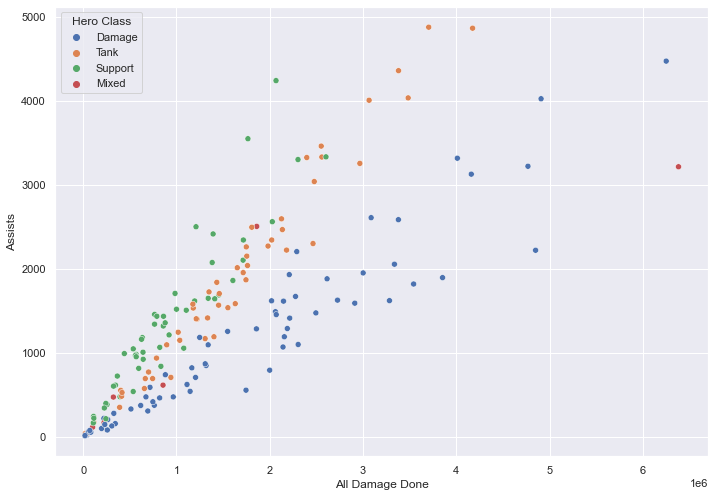

In [46]:
sns.scatterplot(data = clean_df_2021, x = 'All Damage Done', y = "Assists", hue = "Hero Class")

<AxesSubplot:xlabel='Hero Class', ylabel='Eliminations'>

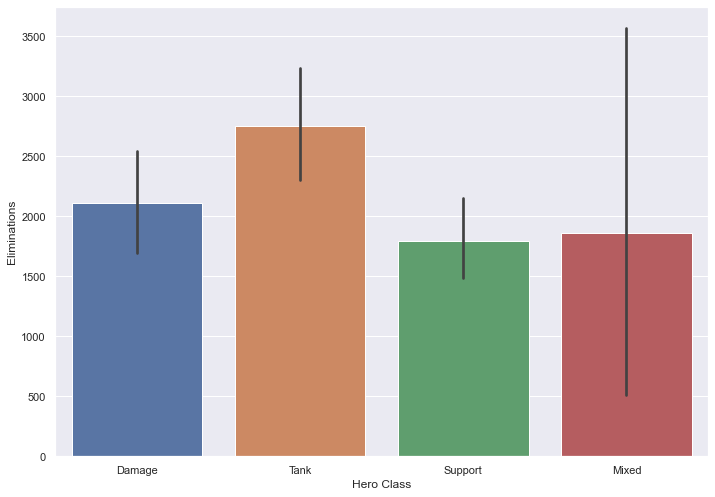

In [47]:
sns.barplot(data = clean_df_2021, x = 'Hero Class', y = "Eliminations")

<AxesSubplot:xlabel='All Damage Done', ylabel='Average Time Alive'>

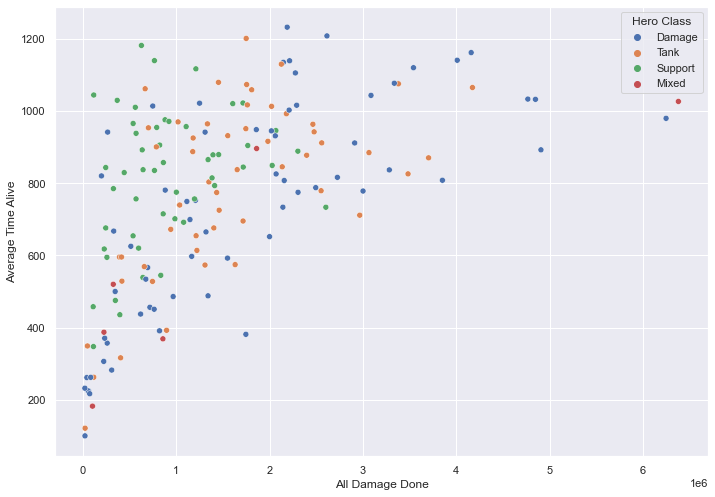

In [48]:
sns.scatterplot(data = clean_df_2021, x = 'All Damage Done', y = "Average Time Alive", hue = "Hero Class")

<AxesSubplot:xlabel='Healing Done', ylabel='Average Time Alive'>

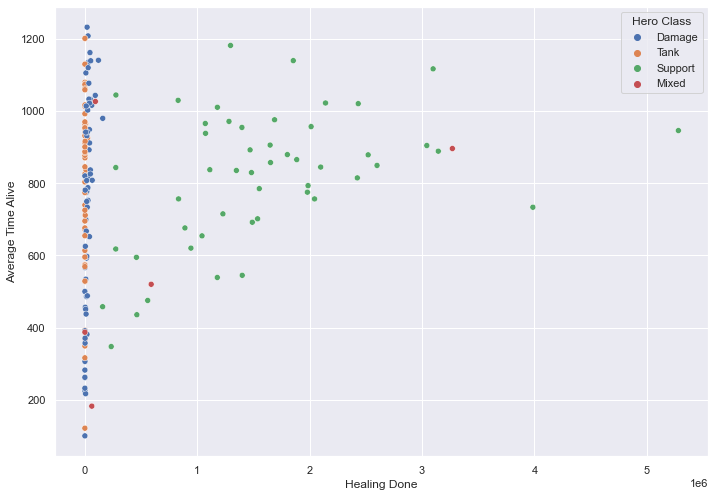

In [49]:
sns.scatterplot(data = clean_df_2021, x = 'Healing Done', y = "Average Time Alive", hue = "Hero Class")

<AxesSubplot:xlabel='Healing Done', ylabel='Weapon Accuracy'>

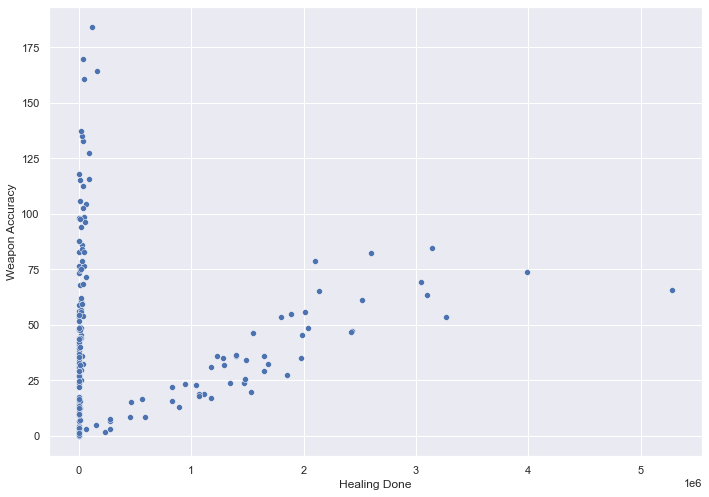

In [50]:
sns.scatterplot(data = clean_df_2021, x = 'Healing Done', y = "Weapon Accuracy")

<AxesSubplot:xlabel='Damage Done', ylabel='Healing Done'>

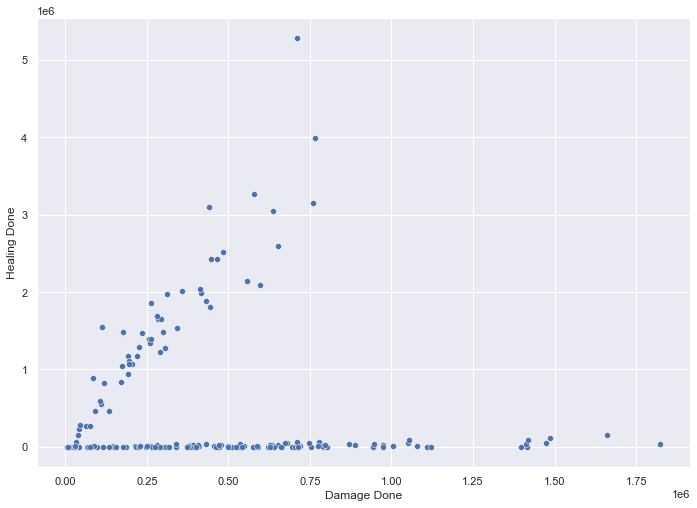

In [51]:
sns.scatterplot(data = clean_df_2021, x = 'Damage Done', y = "Healing Done")

<AxesSubplot:xlabel='All Damage Done', ylabel='Weapon Accuracy'>

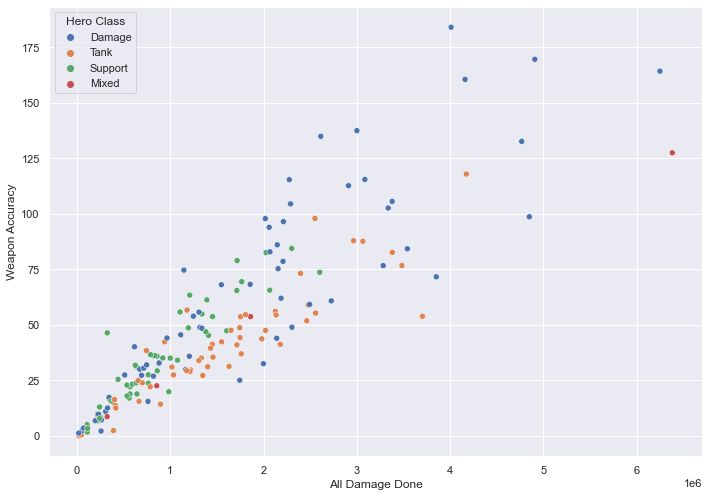

In [52]:
sns.scatterplot(data = clean_df_2021, x = 'All Damage Done', y = "Weapon Accuracy", hue = "Hero Class")

<AxesSubplot:xlabel='Total Appearances', ylabel='Average Time Alive'>

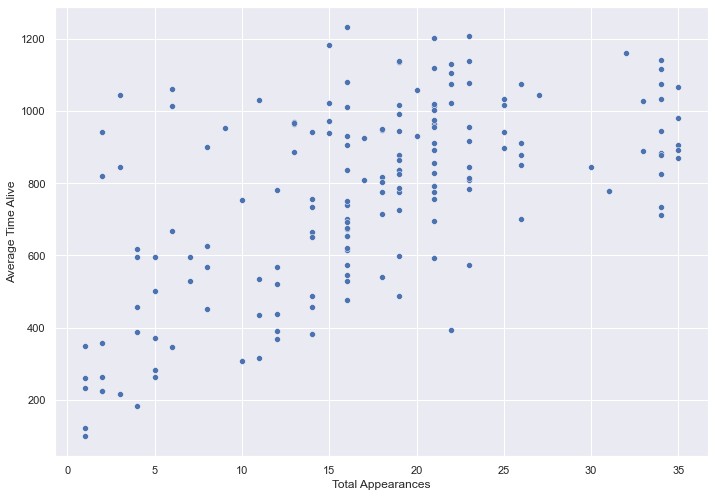

In [53]:
sns.scatterplot(data = clean_df_2021, x = 'Total Appearances', y = "Average Time Alive")

<AxesSubplot:xlabel='Damage Done', ylabel='Average Time Alive'>

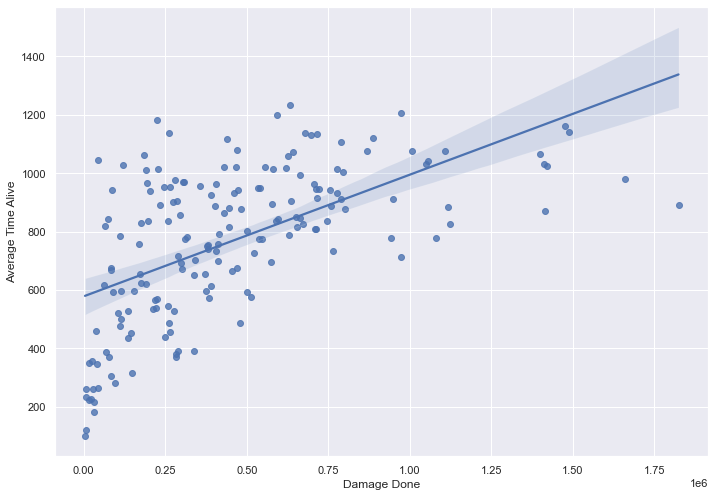

In [54]:
sns.regplot(data = clean_df_2021, x = 'Damage Done', y = "Average Time Alive")

<AxesSubplot:xlabel='Total Appearances', ylabel='Weapon Accuracy'>

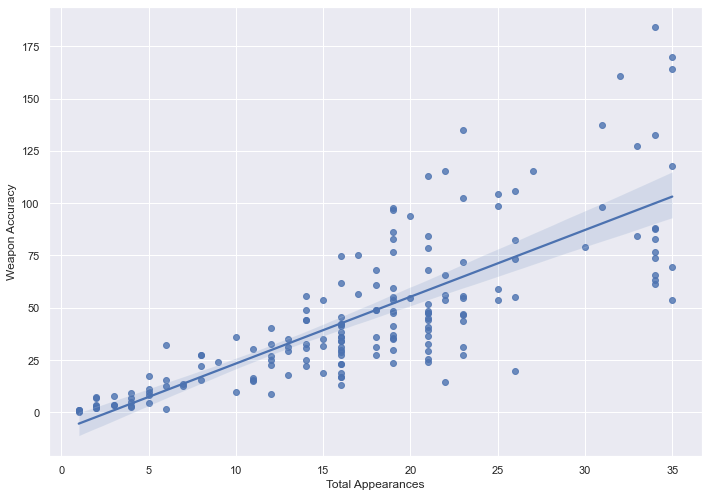

In [55]:
sns.regplot(data = clean_df_2021, x = 'Total Appearances', y = "Weapon Accuracy")

<AxesSubplot:xlabel='Average Time Alive', ylabel='Assists'>

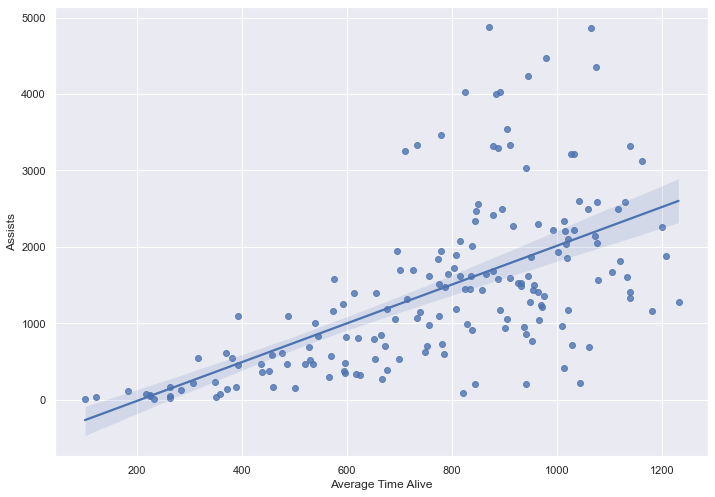

In [56]:
sns.regplot(data = clean_df_2021, x = 'Average Time Alive', y = "Assists")

<AxesSubplot:xlabel='Average Time Alive', ylabel='Eliminations'>

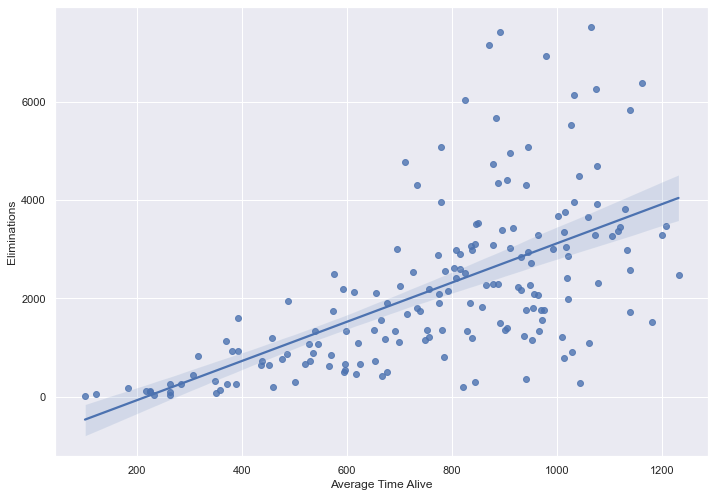

In [57]:
sns.regplot(data = clean_df_2021, x = 'Average Time Alive', y = "Eliminations")

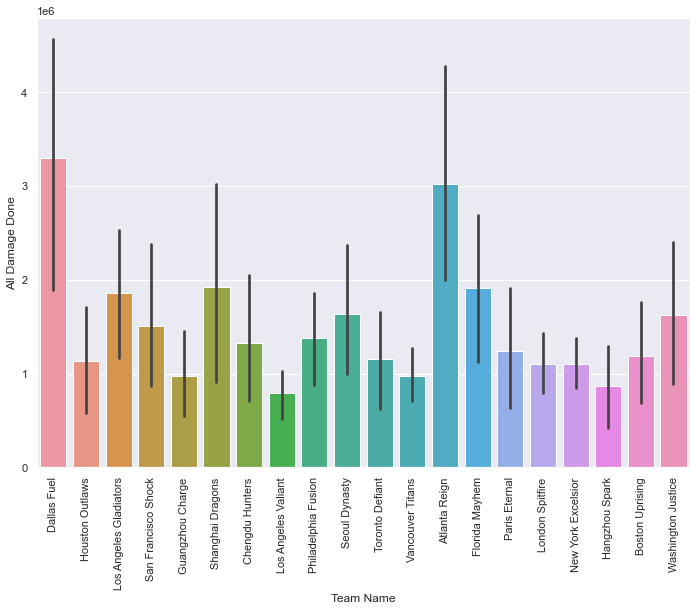

In [92]:
chart = sns.barplot(data = clean_df_2021, x = "Team Name", y = "All Damage Done")
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [62]:
# Begin k means plus plus classification
import sklearn.cluster as cluster

In [63]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++')

In [64]:
kmeans = kmeans.fit(clean_df_2021[['Damage Done', 'Eliminations']])

In [65]:
kmeans.cluster_centers_

array([[3.65226043e+05, 1.77600000e+03],
       [1.01030690e+06, 4.52446154e+03],
       [1.12647400e+05, 5.90703704e+02],
       [1.51118875e+06, 6.61325000e+03],
       [6.65786835e+05, 3.28880952e+03]])

In [66]:
sns.set()

In [67]:
clean_df_2021['Hero Class'].value_counts()

Damage     66
Tank       52
Support    50
Mixed       6
Name: Hero Class, dtype: int64

In [68]:
train = clean_df_2021.copy()

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop('Hero Class', axis = 1), train['Hero Class'])

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()

In [71]:
neigh.fit(x_train.drop(['Name', 'Team Name'], axis = 1).values, y_train.values)

KNeighborsClassifier()

In [72]:
predictions = neigh.predict(x_test.drop(['Name', 'Team Name'], axis = 1).values)

In [73]:
x_test

,Name,Total Appearances,Team Name,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage - Quick Melee,Damage Blocked,Damage Done,...,Damage - Chain Hook,Damage - Whole Hog,Enemies Hooked,Hook Accuracy,Whole Hog Efficiency,Whole Hog Kills,Tank Efficiency,Tank Kills,NaN,Total Mayhem Kills
139,BEBE,23.0,Washington Justice,1.382785e+06,2072.0,814.630643,448726.468091,8222.016667,0.000000e+00,4.460875e+05,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
156,WhoRu,2.0,Shanghai Dragons,5.406347e+04,52.0,224.860623,5713.980429,375.447582,8.283000e+02,2.259018e+04,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,Crimzo,19.0,Houston Outlaws,1.453645e+06,1686.0,879.159286,528147.564432,3439.785229,0.000000e+00,4.448771e+05,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
40,LeeJaeGon,34.0,Shanghai Dragons,1.209509e+06,2498.0,1116.641253,296155.783313,20733.335843,4.526369e+05,4.405835e+05,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
126,SeoMinSoo,6.0,Hangzhou Spark,3.286464e+05,276.0,667.325675,64916.962706,2789.688606,2.198003e+04,8.440097e+04,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
92,GangNamJin,21.0,Florida Mayhem,1.604916e+06,1858.0,1020.298169,615277.740556,5488.825080,0.000000e+00,4.660536e+05,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
91,GARGOYLE,21.0,Florida Mayhem,2.463749e+06,2298.0,963.153818,981638.116796,39483.167622,2.372536e+06,7.055415e+05,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
93,OGE,19.0,Florida Mayhem,1.761434e+06,2036.0,1016.769239,467635.195027,31596.114043,2.155793e+06,6.207078e+05,...,60.000000,0.000000,2.0,0.833333,0.000000,0.0,0.0,0.0,0.0,0.0
150,ameng,11.0,Chengdu Hunters,4.023919e+05,550.0,316.324168,92554.489086,5275.501707,7.817532e+04,1.497542e+05,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
106,neptuNo,4.0,Paris Eternal,2.271848e+05,340.0,617.725197,90340.832052,3267.715034,2.835996e+04,6.402758e+04,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [74]:
predictions

array(['Support', 'Damage', 'Support', 'Support', 'Damage', 'Support',
       'Tank', 'Tank', 'Damage', 'Support', 'Damage', 'Damage', 'Support',
       'Damage', 'Damage', 'Tank', 'Damage', 'Damage', 'Tank', 'Support',
       'Tank', 'Tank', 'Tank', 'Damage', 'Damage', 'Support', 'Support',
       'Tank', 'Tank', 'Damage', 'Tank', 'Damage', 'Tank', 'Damage',
       'Support', 'Damage', 'Tank', 'Support', 'Tank', 'Tank', 'Tank',
       'Damage', 'Damage', 'Tank'], dtype=object)

In [75]:
results = pd.DataFrame()

In [76]:
results['Name'] = x_test['Name'].values
results['Predicted Role'] = predictions

In [77]:
results

,Name,Predicted Role
0,BEBE,Support
1,WhoRu,Damage
2,Crimzo,Support
3,LeeJaeGon,Support
4,SeoMinSoo,Damage
5,GangNamJin,Support
6,GARGOYLE,Tank
7,OGE,Tank
8,ameng,Damage
9,neptuNo,Support


In [78]:
results['Real Role'] = ""

In [82]:
i = 0
for name in results['Name']:
    results['Real Role'].iloc[i] = clean_df_2021.loc[clean_df_2021['Name'] == name]['Hero Class']
    i = i +1

In [83]:
results

,Name,Predicted Role,Real Role
0,BEBE,Support,"139 Support Name: Hero Class, dtype: object"
1,WhoRu,Damage,"156 Damage Name: Hero Class, dtype: object"
2,Crimzo,Support,"6 Support Name: Hero Class, dtype: object"
3,LeeJaeGon,Support,"40 Support Name: Hero Class, dtype: object"
4,SeoMinSoo,Damage,"126 Damage Name: Hero Class, dtype: object"
5,GangNamJin,Support,"92 Support Name: Hero Class, dtype: object"
6,GARGOYLE,Tank,"91 Tank Name: Hero Class, dtype: object"
7,OGE,Tank,"93 Tank Name: Hero Class, dtype: object"
8,ameng,Damage,"150 Tank Name: Hero Class, dtype: object"
9,neptuNo,Support,"106 Support Name: Hero Class, dtype: object"


In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Damage       0.71      1.00      0.83        12
       Mixed       0.00      0.00      0.00         3
     Support       0.91      1.00      0.95        10
        Tank       1.00      0.84      0.91        19

    accuracy                           0.86        44
   macro avg       0.65      0.71      0.67        44
weighted avg       0.83      0.86      0.84        44



c:\users\ishan hari kumar\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ishan hari kumar\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ishan hari kumar\pycharmprojects\pythonproject1\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [86]:
team_train = train.copy()
team_x_train, team_x_test, team_y_train, team_y_test = train_test_split(team_train.drop('Team Name', axis = 1), team_train['Team Name'])

neigh_team = KNeighborsClassifier()

neigh_team.fit(team_x_train.drop(['Name', 'Hero Class'], axis = 1).values, team_y_train.values)

team_predictions = neigh_team.predict(team_x_test.drop(['Name', 'Hero Class'], axis = 1).values)

In [87]:
team_predictions

array(['Shanghai Dragons', 'Hangzhou Spark', 'Boston Uprising',
       'Hangzhou Spark', 'Los Angeles Valiant', 'Toronto Defiant',
       'Florida Mayhem', 'Hangzhou Spark', 'Boston Uprising',
       'Houston Outlaws', 'Boston Uprising', 'Shanghai Dragons',
       'Boston Uprising', 'Chengdu Hunters', 'Florida Mayhem',
       'Shanghai Dragons', 'Chengdu Hunters', 'Boston Uprising',
       'Houston Outlaws', 'Toronto Defiant', 'Houston Outlaws',
       'Florida Mayhem', 'Boston Uprising', 'Boston Uprising',
       'Shanghai Dragons', 'Chengdu Hunters', 'Houston Outlaws',
       'Hangzhou Spark', 'Hangzhou Spark', 'Vancouver Titans',
       'Boston Uprising', 'Chengdu Hunters', 'Boston Uprising',
       'London Spitfire', 'Boston Uprising', 'Atlanta Reign',
       'Boston Uprising', 'Boston Uprising', 'Hangzhou Spark',
       'Boston Uprising', 'Guangzhou Charge', 'Chengdu Hunters',
       'Boston Uprising', 'Toronto Defiant'], dtype=object)

In [88]:
team_x_test

,Name,Total Appearances,Hero Class,All Damage Done,Assists,Average Time Alive,Barrier Damage Done,Damage - Quick Melee,Damage Blocked,Damage Done,...,Damage - Chain Hook,Damage - Whole Hog,Enemies Hooked,Hook Accuracy,Whole Hog Efficiency,Whole Hog Kills,Tank Efficiency,Tank Kills,NaN,Total Mayhem Kills
0,Doha,35.0,Damage,6.249478e+06,4470.0,979.539334,1.163108e+06,17164.568955,5.800057e+05,1.660734e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Happy,19.0,Damage,2.147354e+06,1612.0,1134.727856,6.422844e+05,11649.503567,1.266106e+05,7.141375e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,BERNAR,18.0,Tank,1.745031e+06,1866.0,950.953288,6.076384e+05,30493.552339,1.659715e+06,5.419987e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,im37,19.0,Damage,2.069418e+06,1452.0,825.560168,6.636354e+05,8100.323999,3.632365e+04,6.730389e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,MoLanran,16.0,Damage,1.112996e+06,620.0,749.378931,3.267235e+05,21429.426559,1.476417e+04,3.785785e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,WhoRu,2.0,Damage,5.406347e+04,52.0,224.860623,5.713980e+03,375.447582,8.283000e+02,2.259018e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,Mmonk,30.0,Support,1.717257e+06,2340.0,844.611888,4.922671e+05,11454.959082,2.898548e+03,5.969318e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,Birdring,25.0,Damage,2.289662e+06,2202.0,1015.883607,6.048513e+05,12210.858975,6.077899e+04,7.768491e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,skewed,26.0,Support,9.847670e+05,1704.0,701.356965,2.798767e+05,1454.226189,3.675967e+05,3.418321e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,JinMu,27.0,Damage,3.086641e+06,2606.0,1043.114068,7.880557e+05,12774.879868,1.506380e+04,1.054755e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
